# SNOW Partitioning

The filter is used to partition an image into regions using the [SNOW](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307) algorithm which stands for the subnetwork of the oversegmented watershed. The steps taken are described in detail in the snow_advanced notebook. We provide a filter function that combines all the steps and it is explored here:

In [1]:
import numpy as np
import porespy as ps
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation
ps.visualization.set_mpl_style()

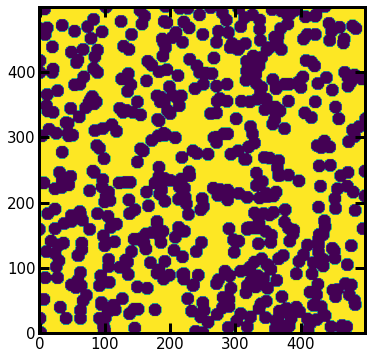

In [2]:
#NBVAL_IGNORE_OUTPUT
np.random.seed(1)
im = ps.generators.overlapping_spheres([500, 500], radius=10, porosity=0.5)
plt.figure(figsize=[6, 6])
plt.imshow(im, origin='lower')
plt.show()

In [3]:
snow_out = ps.filters.snow_partitioning(im, r_max=4, sigma=0.4, return_all=True)
print(snow_out._fields)

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  302
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Peaks after trimming saddle points:  258
Peaks after trimming nearby peaks:  251
('im', 'dt', 'peaks', 'regions')


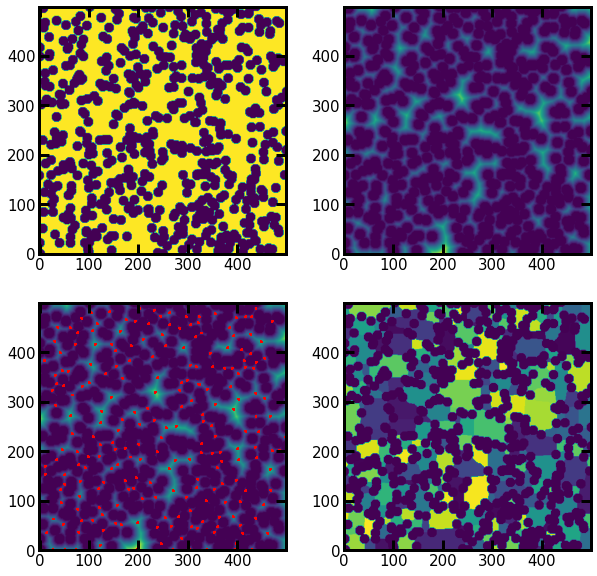

In [4]:
#NBVAL_IGNORE_OUTPUT
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 10])
ax1.imshow(snow_out.im, origin='lower')
ax2.imshow(snow_out.dt, origin='lower')
dt_peak = snow_out.dt.copy()
peaks_dilated = binary_dilation(snow_out.peaks > 0)
dt_peak[peaks_dilated > 0] = np.nan
cmap = cm.viridis
cmap.set_bad('red', 1.)
ax3.imshow(dt_peak, origin='lower', cmap=cmap)
ax4.imshow(snow_out.regions, origin='lower')
plt.show()